In [1]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
df_list = list()
chunk_iter = pd.read_csv(
    "Total_Data_10Y_Top23.csv", 
    chunksize=100000
)
for chunk in tqdm(chunk_iter):
    df_list.append(chunk.loc[:, ["FL_DATE", "OP_UNIQUE_CARRIER", "TAIL_NUM", "ORIGIN_CITY_NAME", "DEST_CITY_NAME", "DEP_TIME", "DEP_DELAY", "ARR_TIME", "ARR_DELAY", "CANCELLED"]])
df = pd.concat(df_list)
df.head()

32it [00:11,  2.97it/s]C:\Users\CEO\anaconda3\Lib\site-packages\tqdm\std.py:1181: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  for obj in iterable:
33it [00:11,  2.92it/s]C:\Users\CEO\anaconda3\Lib\site-packages\tqdm\std.py:1181: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  for obj in iterable:
64it [00:21,  2.95it/s]C:\Users\CEO\anaconda3\Lib\site-packages\tqdm\std.py:1181: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  for obj in iterable:
123it [00:42,  2.92it/s]C:\Users\CEO\anaconda3\Lib\site-packages\tqdm\std.py:1181: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  for obj in iterable:
128it [00:44,  2.46it/s]C:\Users\CEO\anaconda3\Lib\site-packages\tqdm\std.py:1181: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memor

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED
0,2014-07-01,AA,N002AA,"Charlotte, NC","Dallas/Fort Worth, TX",1025.0,-5.0,1214.0,9.0,0.0
1,2014-07-01,AA,N002AA,"Dallas/Fort Worth, TX","Charlotte, NC",621.0,-4.0,945.0,0.0,0.0
2,2014-07-01,AA,N004AA,"Atlanta, GA","Dallas/Fort Worth, TX",1238.0,-2.0,1341.0,-9.0,0.0
3,2014-07-01,AA,N004AA,"Dallas/Fort Worth, TX","Atlanta, GA",904.0,14.0,1159.0,4.0,0.0
4,2014-07-01,AA,N004AA,"Dallas/Fort Worth, TX","Atlanta, GA",2016.0,1.0,2317.0,2.0,0.0


In [5]:
df.shape

(12926556, 10)

In [7]:
df.rename(columns={'FL_DATE': 'Flight Date', 'DEP_DELAY': 'Departure Delay', 'ARR_DELAY': 'Arrival Delay', 'DEP_TIME': 'Departure Time', 'ARR_TIME': 'Arrival Time'}, inplace=True)

In [9]:
df.to_csv('flight_data.csv')

In [12]:
flight_data = pd.read_csv('flight_data.csv')
flight_data.head()

,Unnamed: 0,Flight Date,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN_CITY_NAME,DEST_CITY_NAME,Departure Time,Departure Delay,Arrival Time,Arrival Delay,CANCELLED
0,0,2014-07-01,AA,N002AA,"Charlotte, NC","Dallas/Fort Worth, TX",1025.0,-5.0,1214.0,9.0,0.0
1,1,2014-07-01,AA,N002AA,"Dallas/Fort Worth, TX","Charlotte, NC",621.0,-4.0,945.0,0.0,0.0
2,2,2014-07-01,AA,N004AA,"Atlanta, GA","Dallas/Fort Worth, TX",1238.0,-2.0,1341.0,-9.0,0.0
3,3,2014-07-01,AA,N004AA,"Dallas/Fort Worth, TX","Atlanta, GA",904.0,14.0,1159.0,4.0,0.0
4,4,2014-07-01,AA,N004AA,"Dallas/Fort Worth, TX","Atlanta, GA",2016.0,1.0,2317.0,2.0,0.0


In [13]:
flight_data = flight_data.drop('Unnamed: 0', axis =1)

In [14]:
flight_data.head()

,Flight Date,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN_CITY_NAME,DEST_CITY_NAME,Departure Time,Departure Delay,Arrival Time,Arrival Delay,CANCELLED
0,2014-07-01,AA,N002AA,"Charlotte, NC","Dallas/Fort Worth, TX",1025.0,-5.0,1214.0,9.0,0.0
1,2014-07-01,AA,N002AA,"Dallas/Fort Worth, TX","Charlotte, NC",621.0,-4.0,945.0,0.0,0.0
2,2014-07-01,AA,N004AA,"Atlanta, GA","Dallas/Fort Worth, TX",1238.0,-2.0,1341.0,-9.0,0.0
3,2014-07-01,AA,N004AA,"Dallas/Fort Worth, TX","Atlanta, GA",904.0,14.0,1159.0,4.0,0.0
4,2014-07-01,AA,N004AA,"Dallas/Fort Worth, TX","Atlanta, GA",2016.0,1.0,2317.0,2.0,0.0


In [15]:
# Assuming the flight data is already loaded into a DataFrame called flight_data
# Replace 'Departure Delay' and 'Arrival Delay' with actual column names in your dataset

# Convert the delay columns to numeric values to handle non-numeric values if any
flight_data['Departure Delay'] = pd.to_numeric(flight_data['Departure Delay'], errors='coerce')
flight_data['Arrival Delay'] = pd.to_numeric(flight_data['Arrival Delay'], errors='coerce')

# Calculate the average delay for departures and arrivals
avg_departure_delay = flight_data['Departure Delay'].mean()
avg_arrival_delay = flight_data['Arrival Delay'].mean()

# Display the results
print(f"Average Departure Delay: {avg_departure_delay:.2f} minutes")
print(f"Average Arrival Delay: {avg_arrival_delay:.2f} minutes")

Average Departure Delay: 11.27 minutes
Average Arrival Delay: 5.41 minutes


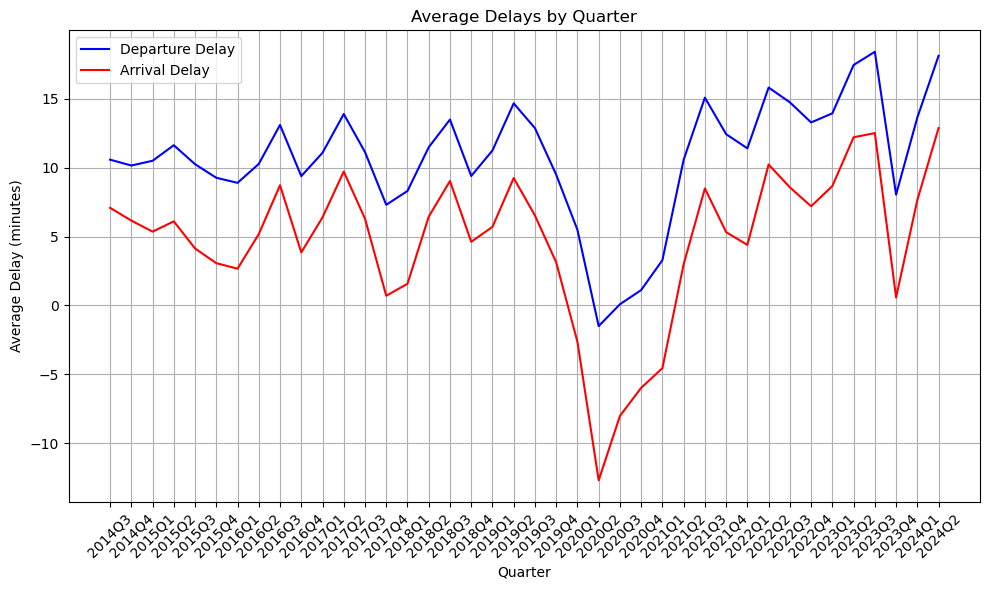

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Flight Date' is in datetime format
flight_data['Flight Date'] = pd.to_datetime(flight_data['Flight Date'], errors='coerce')

# Create a new column for the quarter
flight_data['Quarter'] = flight_data['Flight Date'].dt.to_period('Q')

# Group by 'Quarter' and calculate the average delay for each quarter
delay_by_quarter = flight_data.groupby('Quarter').agg({
    'Departure Delay': 'mean',
    'Arrival Delay': 'mean'
}).reset_index()

# Plot the average delays by quarter
plt.figure(figsize=(10, 6))

# Plotting departure delays
plt.plot(delay_by_quarter['Quarter'].astype(str), delay_by_quarter['Departure Delay'], label='Departure Delay', color='blue')

# Plotting arrival delays
plt.plot(delay_by_quarter['Quarter'].astype(str), delay_by_quarter['Arrival Delay'], label='Arrival Delay', color='red')

plt.xticks(rotation=45)
plt.xlabel('Quarter')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delays by Quarter')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Quarterly Variation: The plot will show how the average delay (both for departures and arrivals) varies across different quarters. For example, you might observe that delays tend to increase in certain quarters, like Q3 (July to September), possibly due to increased travel during summer vacations.

# Departure vs. Arrival Delays: By comparing the two lines (one for departure delays and one for arrival delays), you can assess if flights generally experience more delays at departure or upon arrival. For instance, if the red line (arrival delays) is consistently above the blue line (departure delays), it means that flights tend to be more delayed when they arrive at their destinations than when they depart.

# Seasonality Trends: You might observe seasonal patterns in delays. For instance, Q4 (October to December) could have higher delays due to holiday travel, winter weather, or other seasonal factors. On the other hand, Q1 might have fewer delays if weather conditions are more stable or if travel demand is lower.

# Potential Causes: If you observe specific quarters with consistently higher delays, you could investigate further into external factors during those periods—such as bad weather, air traffic control issues, or operational inefficiencies.

# This shows a clearer picture of when delays tend to spike and use that information for operational or planning decisions. Let me know if you'd like to explore further interpretations!

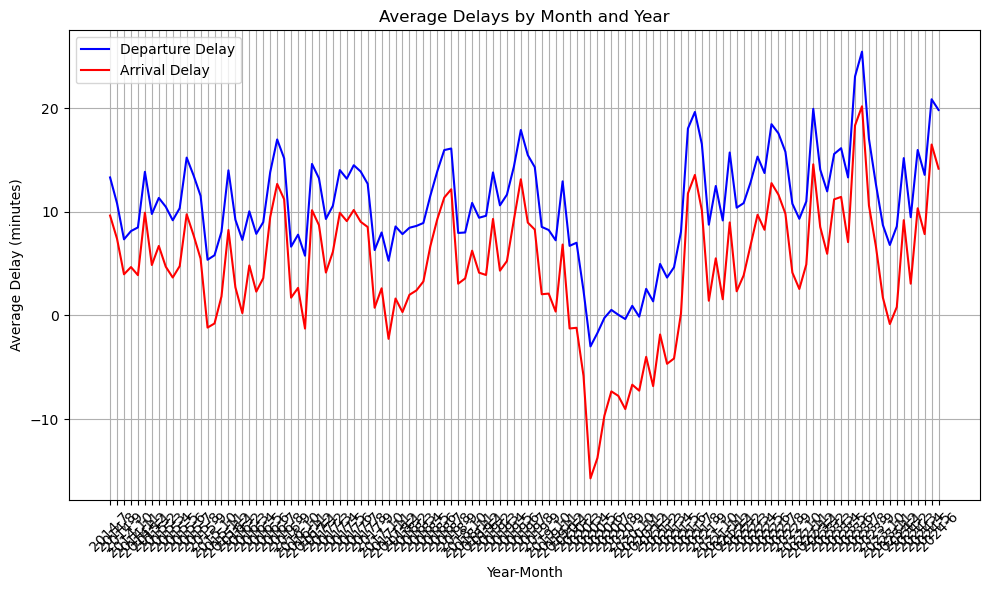

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Flight Date' to datetime format (replace with your column name)
flight_data['Flight Date'] = pd.to_datetime(flight_data['Flight Date'], errors='coerce')

# Extract the year and month from 'Flight Date'
flight_data['Year'] = flight_data['Flight Date'].dt.year
flight_data['Month'] = flight_data['Flight Date'].dt.month

# Group by both 'Year' and 'Month' to calculate the average delay for each month in each year
delay_by_month_year = flight_data.groupby(['Year', 'Month']).agg({
    'Departure Delay': 'mean',
    'Arrival Delay': 'mean'
}).reset_index()

# Plot the average delays by month and year
plt.figure(figsize=(10, 6))

# Plotting departure delays
plt.plot(delay_by_month_year['Year'].astype(str) + '-' + delay_by_month_year['Month'].astype(str),
         delay_by_month_year['Departure Delay'], label='Departure Delay', color='blue')

# Plotting arrival delays
plt.plot(delay_by_month_year['Year'].astype(str) + '-' + delay_by_month_year['Month'].astype(str),
         delay_by_month_year['Arrival Delay'], label='Arrival Delay', color='red')

plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delays by Month and Year')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Quarterly Variation: The plot will show how the average delay (both for departures and arrivals) varies across different quarters. For example, you might observe that delays tend to increase in certain quarters, like Q3 (July to September), possibly due to increased travel during summer vacations.

# Departure vs. Arrival Delays: By comparing the two lines (one for departure delays and one for arrival delays), you can assess if flights generally experience more delays at departure or upon arrival. For instance, if the red line (arrival delays) is consistently above the blue line (departure delays), it means that flights tend to be more delayed when they arrive at their destinations than when they depart.

# Seasonality Trends: You might observe seasonal patterns in delays. For instance, Q4 (October to December) could have higher delays due to holiday travel, winter weather, or other seasonal factors. On the other hand, Q1 might have fewer delays if weather conditions are more stable or if travel demand is lower.

# Potential Causes: If you observe specific quarters with consistently higher delays, you could investigate further into external factors during those periods—such as bad weather, air traffic control issues, or operational inefficiencies.

# This shows a clearer picture of when delays tend to spike and use that information for operational or planning decisions. Let me know if you'd like to explore further interpretations!

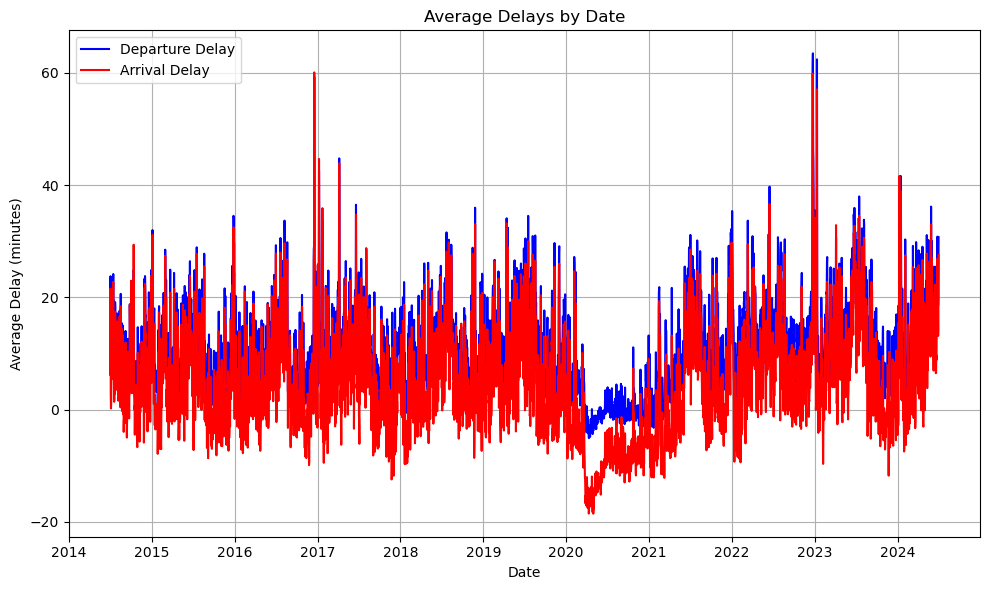

In [16]:
# Convert 'Flight Date' to datetime format (replace with your column name)
flight_data['Flight Date'] = pd.to_datetime(flight_data['Flight Date'], errors='coerce')

# Group by 'Flight Date' and calculate the average delay for each day
delay_by_date = flight_data.groupby('Flight Date').agg({
    'Departure Delay': 'mean',
    'Arrival Delay': 'mean'
})

# Plot the average delays over time
plt.figure(figsize=(10, 6))
plt.plot(delay_by_date.index, delay_by_date['Departure Delay'], label='Departure Delay', color='blue')
plt.plot(delay_by_date.index, delay_by_date['Arrival Delay'], label='Arrival Delay', color='red')
plt.xlabel('Date')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delays by Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


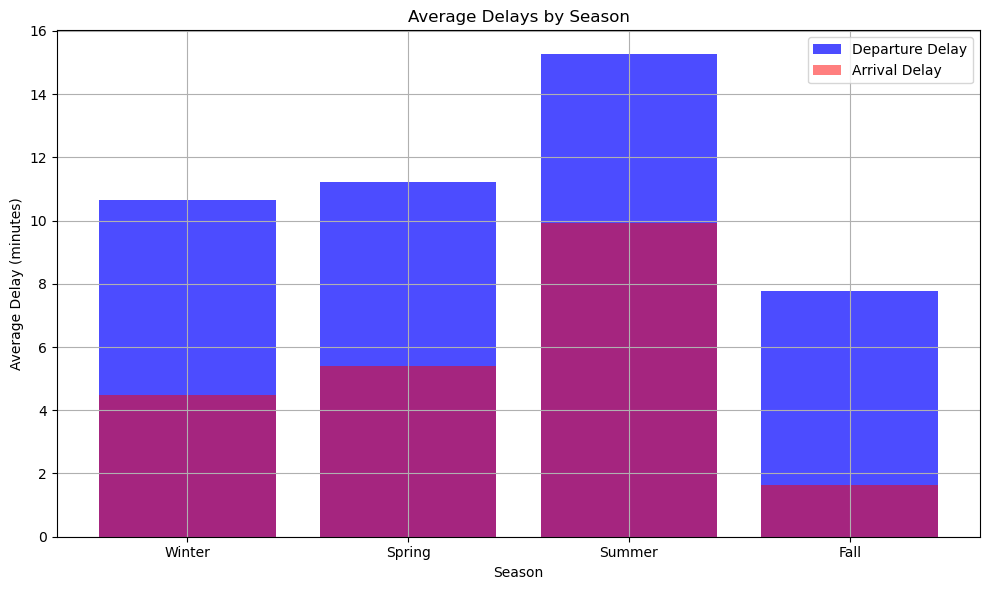

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the flight data is already loaded into the DataFrame 'flight_data'
# Replace 'Flight Date' with the actual column name containing the date

# Convert 'Flight Date' to datetime format
flight_data['Flight Date'] = pd.to_datetime(flight_data['Flight Date'], errors='coerce')

# Extract the month from 'Flight Date'
flight_data['Month'] = flight_data['Flight Date'].dt.month

# Define a function to assign seasons based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the 'get_season' function to create a new 'Season' column
flight_data['Season'] = flight_data['Month'].apply(get_season)

# Group by 'Season' and calculate the average delay for each season
delay_by_season = flight_data.groupby('Season').agg({
    'Departure Delay': 'mean',
    'Arrival Delay': 'mean'
})

# Ensure all seasons are included in the plot, even if some have no data
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
delay_by_season = delay_by_season.reindex(seasons)

# Plot the average delay by season
plt.figure(figsize=(10, 6))
plt.bar(delay_by_season.index, delay_by_season['Departure Delay'], label='Departure Delay', color='blue', alpha=0.7)
plt.bar(delay_by_season.index, delay_by_season['Arrival Delay'], label='Arrival Delay', color='red', alpha=0.5)
plt.xlabel('Season')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delays by Season')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Winter: This season shows relatively higher average delays, likely due to weather-related issues like snow and storms.
# Spring and Fall: These seasons show relatively moderate delays for both departures and arrivals.
# Summer: The delays are slightly higher compared to spring and fall, possibly due to increased travel volume during the holiday season.

In [21]:

flight_data = pd.read_csv('flight_data.csv')

# Grouping by Origin and Destination city to count the number of flights per route
route_counts = flight_data.groupby(['ORIGIN_CITY_NAME', 'DEST_CITY_NAME']).size().reset_index(name='Flight Count')

# Sorting by the number of flights in descending order to get the busiest routes
busiest_routes = route_counts.sort_values(by='Flight Count', ascending=False).head(10)

# Display the busiest routes
print(busiest_routes)


      ORIGIN_CITY_NAME     DEST_CITY_NAME  Flight Count
396  San Francisco, CA    Los Angeles, CA        131722
192    Los Angeles, CA  San Francisco, CA        130860
185    Los Angeles, CA       New York, NY        108939
249       New York, NY    Los Angeles, CA        108893
160      Las Vegas, NV    Los Angeles, CA        104072
182    Los Angeles, CA      Las Vegas, NV        103935
284        Orlando, FL        Atlanta, GA         84774
12         Atlanta, GA        Orlando, FL         84675
469        Seattle, WA    Los Angeles, CA         80753
195    Los Angeles, CA        Seattle, WA         80661


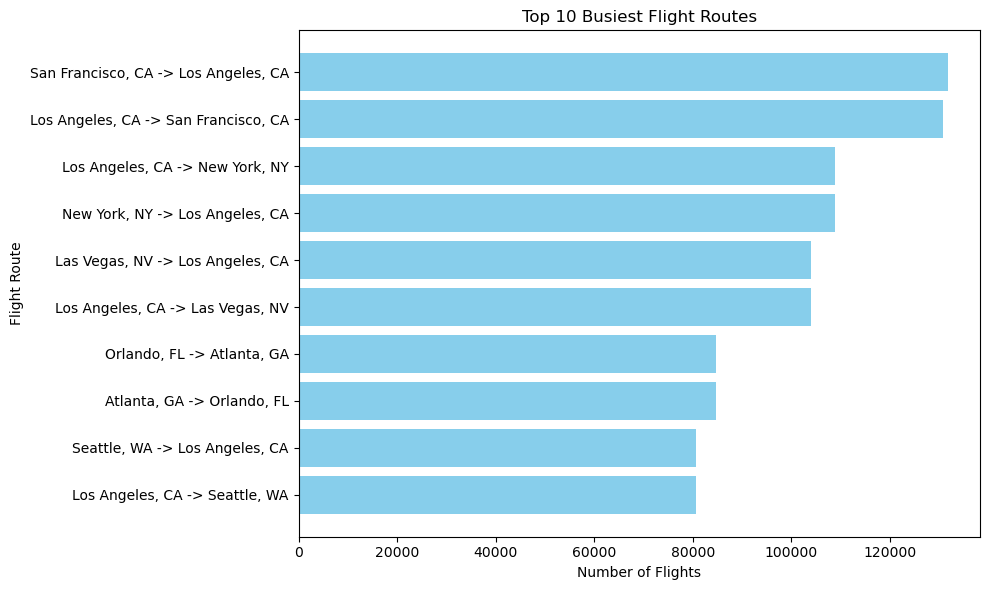

In [23]:

import matplotlib.pyplot as plt

# Plotting the busiest routes
plt.figure(figsize=(10, 6))
plt.barh(busiest_routes['ORIGIN_CITY_NAME'] + ' -> ' + busiest_routes['DEST_CITY_NAME'], 
         busiest_routes['Flight Count'], color='skyblue')
plt.xlabel('Number of Flights')
plt.ylabel('Flight Route')
plt.title('Top 10 Busiest Flight Routes')
plt.gca().invert_yaxis()  # Invert y-axis to show the busiest route at the top
plt.tight_layout()

# Display the plot
plt.show()


In [24]:
# Routes between major metropolitan areas on the U.S. west coast and cross-country routes between New York and Los Angeles are the busiest. This reflects the high demand for both short-haul and long-haul flights between economic and cultural hubs.

In [25]:
# Defining a flight as "on time" if there is no delay (i.e., delay is <= 0 minutes)
# We'll calculate punctuality for both departure and arrival

# Calculate the percentage of flights with no departure delay (<= 0 minutes)
on_time_departure = (flight_data['Departure Delay'] <= 0).mean() * 100

# Calculate the percentage of flights with no arrival delay (<= 0 minutes)
on_time_arrival = (flight_data['Arrival Delay'] <= 0).mean() * 100

# Display the results
print(f"Departure Punctuality: {on_time_departure:.2f}%")
print(f"Arrival Punctuality: {on_time_arrival:.2f}%")


Departure Punctuality: 59.41%
Arrival Punctuality: 61.55%


C:\Users\CEO\AppData\Local\Temp\ipykernel_55928\1869485166.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  punctuality_by_airline = flight_data.groupby('OP_UNIQUE_CARRIER').apply(


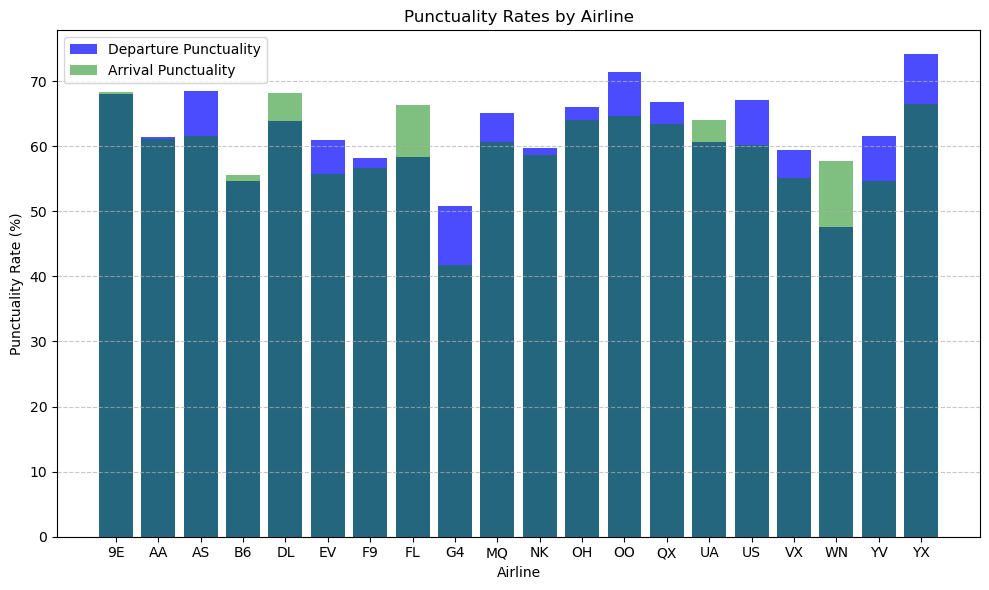

In [29]:

# Assuming 'flight_data' has been loaded earlier

# Grouping the data by airline and calculating the punctuality rate for each
punctuality_by_airline = flight_data.groupby('OP_UNIQUE_CARRIER').apply(
    lambda x: pd.Series({
        'Departure Punctuality': (x['Departure Delay'] <= 0).mean() * 100,
        'Arrival Punctuality': (x['Arrival Delay'] <= 0).mean() * 100
    })
).reset_index()

# Plotting the punctuality rates by airline
plt.figure(figsize=(10, 6))

# Plotting departure punctuality
plt.bar(punctuality_by_airline['OP_UNIQUE_CARRIER'], 
        punctuality_by_airline['Departure Punctuality'], 
        label='Departure Punctuality', color='blue', alpha=0.7)

# Plotting arrival punctuality
plt.bar(punctuality_by_airline['OP_UNIQUE_CARRIER'], 
        punctuality_by_airline['Arrival Punctuality'], 
        label='Arrival Punctuality', color='green', alpha=0.5)

plt.xlabel('Airline')
plt.ylabel('Punctuality Rate (%)')
plt.title('Punctuality Rates by Airline')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [28]:
# Airline Variation: The chart shows that punctuality rates, both for departures and arrivals, vary significantly across airlines. Some airlines have better on-time performance than others, which could be due to factors like efficient operations, route network, or external conditions like weather.

# Departure vs. Arrival Punctuality: While some airlines perform similarly in both departure and arrival punctuality, others may have a gap, indicating that flights might leave on time but encounter delays during the flight.

# Top Performers: Airlines with higher percentages in both departure and arrival punctuality likely focus more on time management and possibly have fewer disruptions, like mechanical issues or traffic control problems, compared to others.

# Improvement Areas: Airlines with lower punctuality rates might need to investigate common causes for delays and implement strategies to improve on-time performance, such as better planning, improved logistics, or alternative routing.

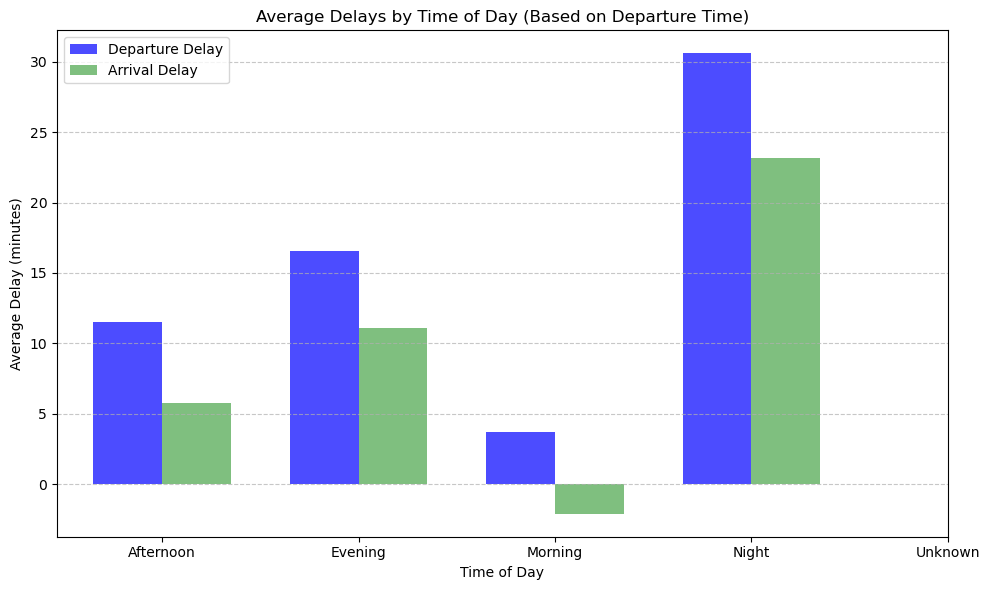

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Rename the 'DEP_TIME' column to 'Departure Time' if not already done
flight_data.rename(columns={'DEP_TIME': 'Departure Time'}, inplace=True)

# Function to categorize times based on 'Departure Time'
def categorize_time(departure_time):
    if pd.isnull(departure_time):
        return 'Unknown'
    elif departure_time >= 500 and departure_time < 1200:
        return 'Morning'
    elif departure_time >= 1200 and departure_time < 1700:
        return 'Afternoon'
    elif departure_time >= 1700 and departure_time < 2100:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column 'Time of Day'
flight_data['Time of Day'] = flight_data['Departure Time'].apply(categorize_time)

# Grouping the data by 'Time of Day' and calculating the average delays
delay_by_time_of_day = flight_data.groupby('Time of Day').agg({
    'Departure Delay': 'mean',
    'Arrival Delay': 'mean'
}).reset_index()

# Defining the position of bars on the x-axis
x = np.arange(len(delay_by_time_of_day['Time of Day']))

# Setting bar width to avoid overlap
bar_width = 0.35

# Plotting the average delays by time of day
plt.figure(figsize=(10, 6))

# Plotting departure delays
plt.bar(x - bar_width/2, 
        delay_by_time_of_day['Departure Delay'], 
        width=bar_width, label='Departure Delay', color='blue', alpha=0.7)

# Plotting arrival delays
plt.bar(x + bar_width/2, 
        delay_by_time_of_day['Arrival Delay'], 
        width=bar_width, label='Arrival Delay', color='green', alpha=0.5)

# Adding labels and title
plt.xlabel('Time of Day')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delays by Time of Day (Based on Departure Time)')
plt.xticks(x, delay_by_time_of_day['Time of Day'])
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# The insight from the chart shows that there are more delay on arrival and departure in the night. 
# This suggest that workers might have been overwelmed and tired from working through the day to night. 
# recommendation is workers welfair and worklife balance should be looked into. 